$\newcommand{\calf}{{\cal F}}
\newcommand{\calk}{{\cal K}}
\newcommand{\calp}{{\cal P}}
\newcommand{\dnu}{d \nu}
\newcommand{\mf}{{\bf F}}
\newcommand{\md}{{\bf D}}
\newcommand{\mP}{{\bf P}}
\newcommand{\mU}{{\bf U}}
\newcommand{\vu}{{\bf u}}
\newcommand{\vx}{{\bf x}}
\newcommand{\vw}{{\bf w}}
\newcommand{\vy}{{\bf y}}
\newcommand{\vf}{{\bf f}}
\newcommand{\vs}{{\bf s}}
\newcommand{\ve}{{\bf e}}
\newcommand{\vd}{{\bf d}}
\newcommand{\vb}{{\bf b}}
\newcommand{\vg}{{\bf g}}
\newcommand{\vz}{{\bf z}}
\newcommand{\vr}{{\bf r}}
\newcommand{\va}{{\bf a}}
\newcommand{\mg}{{\bf G}}
\newcommand{\ml}{{\bf L}}
\newcommand{\mg}{{\bf G}}
\newcommand{\mv}{{\bf V}}
\newcommand{\ma}{{\bf A}}
\newcommand{\mq}{{\bf Q}}
\newcommand{\mr}{{\bf R}}
\newcommand{\mi}{{\bf I}}
\newcommand{\mm}{{\bf M}}
\newcommand{\mb}{{\bf B}}
\newcommand{\ball}{{\cal B}}
\newcommand{\ptc}{{\Psi TC}}
\newcommand{\diag}{\mbox{diag}}
\newcommand{\begeq}{{\begin{equation}}}
\newcommand{\endeq}{{\end{equation}}}
$

In [1]:
include("fanote_init.jl")

## Files for this Chapter

- From the Package repository:
  - Anderson Acceleration Solver: __/src/Solvers/aasol.jl__
  - Test Problems: __/src/TestProblems/Systems__
    - H-equation: __Hequation.jl__
    - Convection-Diffusion equation: __EllipticPDE.jl__ and __PDE\_Tools.jl__
    - Two-point boundary value problem: __Fbvp!.jl__

- From the Notebook repository: __/src/Chapter4__
   - Julia codes that generate the plots and the tables

# Chapter 4: Fixed Point Problems and Anderson Acceleration

## Contents for Chapter 4




[Section 4.1: Fixed Point Problems](#Section-4.1:-Fixed-Point-Problems)

[Section 4.2: Anderson Acceleration](#Section-4.2:-Anderson-Acceleration)

[Section 4.3: Convergence Theory](#Section-4.3:-Convergence-Theory)

[Section 4.4: Two Examples](#Section-4.4:-Two-Examples)

[Section 4.5: Anderson Acceleration Solver](SIAMFANLCh4s.ipynb)

## Section 4.1: Fixed Point Problems

In this chapter we focus on fixed point problems
$$
\vx = \mg(\vx).
$$
While one might think that there is little difference between fixed point
problems and nonlinear equations $\mf(\vx) = 0$, that would be wrong
<cite data-cite="nixon"><a href="siamfa.html#nixon">(Nix72)</cite>.

While simply replacing $\mf(\vx)$ with $\mg(\vx) - \vx$
and applying a form of Newton's method is reasonable in most cases,
that approach can miss important structural properties of $\mg$ and
requires computing a Jacobian or Jacobian-vector product, which is
not always possible. Conversely, applying a fixed point method to
a nonlinear equation with the transformation
$\mg(\vx) = \vx + \mf(\vx)$ can often lead to failure, even in the linear
case. Having said that, there are problems, such as the H-equation
from [Chapter 2](SIAMFANLCh2.ipynb)
 that can be expressed equally well
as nonlinear equations or fixed point problems.

The fundamental method for solving fixed point problems is
Picard or fixed point iteration
$$
\vx_{n+1} = \mg(\vx_n).
$$
Note that, unlike Newton's method, no derivatives are needed in the iteration.

Throughout this chapter we will assume that $\mg$ is a contraction on
a set $D \subset R^N$. This means that there is $\sigma \in (0,1)$ such that
$$
\| \mg(\vx) - \mg(\vy) \| \le \sigma \| \vx - \vy \|
$$
for all $\vx, \vy \in D$. We will call $c$ the
__contractivity constant__.

The
__Contraction Mapping Theorem__
 is

___
__Theorem 4.1.__
If $\mg$ is a contraction on $D \in R^N$ then there is a unique
solution $\vx^* \in D$ ($\vx^* = \mg(\vx^*)$) and for any $\vx_0 \in D$,
the iteration \eqnok{picard} converges to $\vx^*$. Moreover
the convergence is q-linear
$$
\| \ve_{n+1} \| \le \sigma \| \ve_n \|.
$$
___

As in the previous chapters, $\ve = \vx - \vx^*$.

We remind the reader that the uniqueness in __Theorem 4.1__
means that $\vx^*$ is the only solution in $D$. If $\mg$ is
nonlinear, there could well be other fixed points outside of $D$.

Note that the theorem does not specify the norm $\| \cdot \|$. In fact
if $\mg$ is a contraction in any norm, the iteration will converge. One
does not have to know what that norm is, as the linear case illustrates.
If you measure convergence in a norm other than the one in which $\mg$ is
a contraction, you will still observe convergence, but not necessarily
q-linear convergence. At worst you will see
__r-linear convergence__

$$
\| \ve_n \| = O( \sigma^n )
$$
or, equivalently
$$
\limsup_{n \to \infty}
\left( \frac{\| \ve_n \|}{\| \ve_0 \|} \right)^{1/n} \le \sigma.
$$
    
It's worthwhile to consider the case of linear equations
$$
\ma \vx = \vb
$$
and linear fixed point problems
$$
\vx = \mm \vx + \vb.
$$
In the case of linear fixed point problems, contractivity of
$\mg(\vx) = \mm \vx + \vb$ means that $\| \mm \| < 1$ in some
operator norm, equivalently $\rho(\mm) < 1$. Here $\rho$ is
the
__spectral radius__
$$
\rho(\mm) = \max_{\lambda \in \sigma(\mm)} | \lambda |
$$
and $\sigma(\mm)$ is the set of eigenvalues of $\mm$.
The convergence result is the __Banach Lemma__.

___
__Lemma 4.2.__
Suppose $\| \mm \| < 1$. Then for any $\vx_0 \in R^N$ the iteration
$$
\vx_{n+1} = \mm \vx_n + \vb
$$
converges to $\vx^* = (\mi - \mm)^{-1} \vb$. Moreover
$$
\| \ve_{n+1} \| \le \| \mm \| \| \ve_{n} \|.
$$
___

The Banach lemma differs from the Contraction Mapping theorem in that
the map $\mg(\vx) = \mm \vx + \vb$ is a contraction everywhere
(so $D = R^N$) if
$\| \mm \| < 1$. The Contraction Mapping theorem for nonlinear problems
is local in the sense that the domain $D$ is part of the assumptions.
Similarly to Newton's method, we can connect contractivity to
the Jacobian.

___
__Corollary 4.3.__
Suppose $\mg$ is continuously differentiable near a fixed point
$\vx^* = \mg(\vx^*)$ and that
$$
\| \mg'(\vx^*) \| < 1.
$$
Then there is $\delta > 0$ such that $\mg$ is a contraction in the
set
$$
D = \{ \vx \, | \, \| \vx - \vx^* \| < \delta \},
$$
with contractivity constant
$$
\sigma = \| \mg'(\vx^*) \| + O(\delta).
$$
___


### Section 4.1.1: Damping

Sometimes one can replace a noncontractive $\mg$ with
$$
\mg_\beta(\vx) = (1 - \beta) \vx + \beta \mg(\vx)
$$
so that $\mg_\beta$ is a contraction. Typically $-1 \le \beta \le 1$.
If one applies Picard iteration
to $\mg_\beta$ the resulting method is called
__damped Picard iteration__
$$
\vx_{n+1} = (1 - \beta) \vx_n + \beta \mg(\vx_n).
$$
So damped Picard iteration with $\beta = 1$ is simply Picard iteration.

To see the limitations and possibilities of this approach, it helps
to consider the linear case. Suppose for some
$0 < \mu < 1 < K$,
$$
\sigma(\mm) \subset [-K, \mu]
$$
and so $\rho(\mm) \ge K > 1$. If we change $\mm$ to
$$
\mm_\beta = (1 - \beta) \mi + \beta \mm
$$
then for any $0 < \beta < 2/(K+1)$,
$$
\sigma(\mm_\beta)
\subset [1 - \beta (1 + K) , 1 - \beta (1 - \mu)]  \subset (-1, 1)
$$
and therefore $\rho(\mm_\beta) < 1$. Hence the iteration
$$
\vx_{n+1} = \mm_\beta \vx_n + \beta \vb =
(1 - \beta)\vx_n + \beta( \mm \vx_n + \vb)
$$
converges to the solution of
$$
\begin{array}{ll}
\vx^* & = \mm_\beta \vx^* + \beta \vb
= (1 - \beta)\vx^* + \beta( \mm \vx^* + \vb) \\
\\
& = \vx^* - \beta ( \vx^* - \mm \vx^* - \vb),
\end{array}
$$
and $\vx^* = \mm \vx^* + \vb$.

However, the convergence rate is slow if $K$ is large, for example if
$\beta = 1/(K+1)$ then
$$
\rho( \mm_\beta ) \le 1 - \beta (1 - \mu) = \frac{K + \mu}{K+1}
$$
which can be very close to one if $K$ is large or $\mu$ is close to
$1$.  So, while damping can
manufacture contractivity in some __(but not all)__ cases, the
convergence is likely to be poor. Similarly, if
$$
\sigma(\mm) \subset [-\mu, K]
$$
then any $-2/(K+1) < \beta < 0$ will work as a damping parameter.
Damping will not always work. If, for example, the eigenvalues of $\mm$
are $\pm 2$, no damping parameter will make $\rho(\mm_\beta) < 1$.

We now return to the nonlinear case and state an analog of
__Corollary 4.3__.

___
__Corollary 4.4.__
Suppose $\mg$ is continuously differentiable near a fixed point
$\vx^* = \mb(\vx^*)$ and that
there is $\beta$ such that
$$
\| ( 1 - \beta) \mi + \beta \mg'(\vx^*) \| = {\hat \sigma} < 1.
$$
Then for any $\sigma \in ({\hat \sigma}, 1)$ there is 
$\delta > 0$ such that $\mg_\beta$ is a contraction in the
set
$$
D = \{ \vx \, | \, \| \vx - \vx^* \| < \delta \},
$$
with contractivity constant $\sigma$.
___


### Section 4.1.2: Mapping Nonlinear Equations to Fixed Point Problems

If, and this is usually a lot to ask, you have a very good preconditioner
$\mP$ for $\mf(\vx) = 0$, you can apply the preconditioner from the left and
express the nonlinear equation as a
fixed point problem for
$$
\mg(\vx) = \vx - \mP \mf(\vx).
$$
Right preconditioning is similar and we will focus only on left preconditioning
in this section.

In order for a convergence result like __Corollary 4.4__ to hold
we need the standard assumptions for Newton's method and
also require that $\mP$ be an
__approximate inverse__
for $\mf'(\vx^*)$. This means that
$$
\| \mi - \mP \mf'(\vx^*) \| < 1.
$$
In this case, if $\mg = \vx - \mP \mf(\vx)$ then
$$
\| \mg'(\vx^*) \| = \| \mi - \mP \mf'(\vx^*) \| < 1
$$
and we can apply __Corollary 4.4__ directly. It's worthwhile to
state the convergence result explicitly.

___

__Corollary 4.5.__
Let the standard assumptions hold and let $\mP$ be an approximate inverse
of $\mf'(\vx^*)$. Let
$\mg = \vx - \mP \mf(\vx)$ and assume that
$$
\| \mi - \mP \mf'(\vx^*) \| < \sigma < 1.
$$
Then there is
$\delta > 0$ such that $\mg$ is a contraction in the
set
$$
D = \{ \vx \, | \, \| \vx - \vx^* \| < \delta \},
$$
with contractivity constant $\sigma$.
___

One can view any Newton like method as a fixed point iteration in this way.
For example if $\mP = \mf'(\vx_0)^{-1}$, then the fixed point iteration
is the chord method. If you allow $\mP$ to depend on $\vx$, then you
can analyze Newton's method itself as a fixed point iteration
<cite data-cite="ortega"><a href="siamfa.html#ortega">(OR70)</cite>.



### Section 4.1.3: Preconditioning Fixed Point Maps

If we start from a nonlinear equation $\mf(\vx)=0$ and an approximate
inverse for $\mf'(\vx^*)$ the resulting fixed point map, then the resulting Picard iteration
converges. If, however, we start from a fixed point problem
$\mg(\vx) = \vx$, then the corresponding nonlinear equation, following
the convention from 
<cite data-cite="Anderson1965"><a href="siamfa.html#Anderson1965">(And65)</cite>,
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>,
is
$\mf(\vx) = \mg(\vx) - \vx$. This leads to an approach to preconditioning
$\mg$ by finding a good preconditioner for $\mf$
<cite data-cite="HerbstPrecond"><a href="siamfa.html#HerbstPrecond">(HL21)</cite>.
    
For example, if one can find an approximate inverse $\mP$ for
$$
\mf'(\vx^*) = \mg'(\vx^*) - \mi,
$$
then one can apply the ideas in __Section 4.1.2__ and transform $\mg$ to
$$
\mg_{\mP} (\vx) =  \vx - \mP \mf(\vx)
= \vx - \mP (\mg(\vx) - \vx),
$$
which is a special case of equation (18) in
<cite data-cite="HerbstPrecond"><a href="siamfa.html#HerbstPrecond">(HL21)</cite>.


## Section 4.2: Anderson Acceleration

Anderson acceleration 
<cite data-cite="Anderson1965"><a href="siamfa.html#Anderson1965">(And65)</cite>
is an iterative method for fixed point problems and is intended to 
accelerate Picard iteration.
Anderson acceleration was originally designed for integral equations
and is now very common in electronic structure
computations
(see <cite data-cite="dedrichszeller"><a href="siamfa.html#dedrichszeller">(DZ83)</cite>
and many references since then).
Anderson acceleration is essentially the same as
DIIS
(Direct Inversion on the Iterative Subspace)
<cite data-cite="Rohwedder2011"><a href="siamfa.html#Rohwedder2011">(RS11)</cite>,
<cite data-cite="Schneider2008"><a href="siamfa.html#Schneider2008">(SRNB08)</cite>
<cite data-cite="Lin2013"><a href="siamfa.html#Lin2013">(LY13)</cite>,
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>,
nonlinear GMRES
<cite data-cite="Miller2005"><a href="siamfa.html#Miller2005">(Mil05)</cite>,
<cite data-cite="Oosterlee2000"><a href="siamfa.html#Oosterlee2000">(OW00)</cite>,
<cite data-cite="Washio1997"><a href="siamfa.html#Washio1997">(WO97)</cite>,
<cite data-cite="Carlson1998"><a href="siamfa.html#Carlson1998">(CM98)</cite>,
and interface quasi-Newton
<cite data-cite="Degroote09"><a href="siamfa.html#Degroote09">(DBV09)</cite>,
<cite data-cite="Haelterman09"><a href="siamfa.html#Haelterman09">(HDvHV09)</cite>.
<cite data-cite="Linder15"><a href="siamfa.html#Linder15">(LMSU15)</cite>.                                          It is also closely related to
Pulay mixing
<cite data-cite="Pulay1982"><a href="siamfa.html#Pulay1982">(Pul82)</cite>.
also known as
CDIIS (Commutator DIIS),
<cite data-cite="Rohwedder2011"><a href="siamfa.html#Rohwedder2011">(RS11)</cite>,
<cite data-cite="Garza2012"><a href="siamfa.html#Garza2012">(GS12)</cite>,
<cite data-cite="Hu2017"><a href="siamfa.html#Hu2017">(HLY17)</cite>,
    <cite data-cite="Host2008"><a href="siamfa.html#Host2008">(HOJ<sup>+</sup>08)</cite>.
Other variations on the method include CROP (Conjugate Residual with OPtimal trial vectors)
<cite data-cite="Ettenhuber2015crop"><a href="siamfa.html#Ettenhuber2015crop">(EJ15)</cite>,
<cite data-cite="Ziolkowski2008crop"><a href="siamfa.html#Ziolkowski2008crop">(ZJWO08)</cite> and
EDIIS (Energy DIIS) <cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>,
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>.

Anderson acceleration is an important component of many electronic
structure codes. These, in turn, are critical parts of
quantum physics and chemistry codes. Three examples
are the RMG (Real Space Multigrid) large
scale electronic structure computations code <cite data-cite="rmg"><a href="siamfa.html#rmg12">(BSB95)</cite>,     <cite data-cite="rmg12"><a href="siamfa.html#rmg12">(MBH<sup>+</sup>12)</cite>,
the __DFTK.jl__ Julia package 
<cite data-cite="HerbstPrecond"><a href="siamfa.html#HerbstPrecond">(HL21)</cite>,
<cite data-cite="DFTKjcon"><a href="siamfa.html#DFTKjcon">(HLC21)</cite>,
and the Gaussian code for computational chemistry
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>, <cite data-cite="g16"><a href="siamfa.html#g16">(FTS<sup>+</sup>16)</cite>.
    
Other applications include
stiff dislocation dynamics <cite data-cite="carol_dislocation"><a href="siamfa.html#carol_dislocation">(GWR<sup>+</sup>15)</cite>,
hydrology
<cite data-cite="Anderson_hydro"><a href="siamfa.html#Anderson_hydro">(LWWY12)</cite>,
neutron transport 
<cite data-cite="Willert2014"><a href="siamfa.html#Willert2014">(WTK14)</cite>,
<cite data-cite="ctk:anderson2"><a href="siamfa.html#ctk:anderson2">(TEE<sup>+</sup>17)</cite>,
<cite data-cite="dima21"><a href="siamfa.html#dima21">(ACWC21)</cite>,
<cite data-cite="Adamowicz21"><a href="siamfa.html#Adamowicz21">(Ada21)</cite>,
thermal radiation transport
<cite data-cite="An2017"><a href="siamfa.html#An2017">(AJW17)</cite>,
fluid mechanics <cite data-cite="pollock1"><a href="siamfa.html#pollock1">(PRX19)</cite>,
<cite data-cite="pollock3"><a href="siamfa.html#pollock3">(PR21)</cite>,
multiphysics coupling <cite data-cite="alexthesis"><a href="siamfa.html#alexthesis">(Tot16)</cite>,
<cite data-cite="ctk:alexmc"><a href="siamfa.html#ctk:alexmc">(KS<sup>+</sup>15)</cite>,
<cite data-cite="ctk:coupling"><a href="siamfa.html#ctkcoupling">(HBC<sup>+</sup>16)</cite>,
and fluid-structure
interaction <cite data-cite="Ganine2012"><a href="siamfa.html#Ganine2012">(GJHC12)</cite>,
<cite data-cite="Degroote09"><a href="siamfa.html#Degroote09">(DBV09)</cite>,
<cite data-cite="Haelterman09"><a href="siamfa.html#Haelterman09">(HDvHV09)</cite>.
<cite data-cite="Linder15"><a href="siamfa.html#Linder15">(LMSU15)</cite>.     

Anderson acceleration is most useful when Newton's method
is not practical because obtaining approximate Jacobians or
Jacobian-vector products is too costly or not possible at all.
Comparisons indicate that Newton's method performs better when
even moderately accurate derivative information
can be had at reasonable cost
<cite data-cite="ctk:coupling"><a href="siamfa.html#ctkcoupling">(HBC<sup>+</sup>16)</cite>.
Having said that, there are cases when Anderson acceleration does
outperform an efficient implementation of Newton's method 
<cite data-cite="ctk:alex1"><a href="siamfa.html#ctk:alex1">(TK15)</cite>.
We give examples of this poorly understood phenomenon
in section 4.4.

Algorithm __anderson__ is the
the simplest form of the iteration, which is all we cover in this chapter.

![Alg4.1](Images/Alg4dot1.png)
    
We discuss the convergence results, the application of the algorithm,
and the implementation in terms of these algorithmic components and parameters.
    
---
    
- $m$ is the __depth__. Typically in applications
$m$ is small, <cite data-cite="CancesLeBris"><a href="siamfa.html#CancesLebris">(CB00)</cite>
say $\le 10$. There is usually little advantage in large $m$.

- $\beta$ is the __mixing or damping parameter__. It plays exactly
the same role as it does for Picard iteration.
One could vary $\beta$ as the iteration progresses
<cite data-cite="CancesDamping"><a href="siamfa.html#CancesDamping">(CKL21)</cite>,
but we will not do that in this chapter.
    
- $\mf(\vx) = \mg(\vx) - \vx$ is the __residual__.

- The __optimization problem__ is
$$
\min \bigg\| \sum_{j=0}^{m_k} \alpha^k_j \mf(\vx_{k-m_k+j}) \bigg\|
\mbox{ subject to }
\sum_{j=0}^{m_k} \alpha^k_j = 1.
$$
    
- The __coefficients__ are the $\alpha^k_j$s.
    
---
    
The reader who is familiar with GMRES may notice the similarity between Anderson acceleration and 
GMRES for linear problems. In fact
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>
the iterations for 
Anderson Acceleration
and GMRES can be transformed into one another in most cases for
linear problems. This does not mean that Anderson Acceleration is a good
choice for a linear sovler. The storage cost, as we will see, is two to three times 
more than GMRES.


### Section 4.2.1 Algorithmic Details

As you can see from the algorithmic description, Anderson acceleration
keeps a history of the iteration. This history has $m+1$ vectors for
prior residuals and $m+1$ vectors for prior fixed point map evaluations.
Hence Anderson($m$) stores at least twice as much as GMRES($m$) when applied
to a linear problem. There are more efficient ways to implement the method
than a direct translation of Algorithm __anderson__ into code, but the
storage requirements do not change.
Note that Anderson($0$) is Picard iteration.

Similarly to Picard iteration,
Anderson acceleration with mixing parameter $\beta$ is the
same iteration as Anderson acceleration with mixing parameter $1$
applied to the map $\mg_\beta$ defined in __Section 4.1.1__.
For this reason we will state our convergence results for $\beta=1$.

Note that we have not specified the norm in the optimization problem and
the convergence theorem we will present does not depend on the choice
of norm. However, the norm has a significant effect on the implementation.
If one uses the $\ell^1$ or $\ell^\infty$ norm, then the optimization problem
can be formulated as a linear programming problem and solved with many
codes <cite data-cite="cvx"><a href="siamfa.html#cvx">(GB12)</cite>.
However, it is most efficient to use the $\ell^2$ norm
and formulate the optimization problem as a linear least squares problem.
To do this first
solve the linear least squares problem
$$
\min \| \mf(\vx_k) - \sum_{j=0}^{m_k-1} \alpha^k_j
(\mf(\vx_{k-m_k+j})  - \mf(\vx_k) ) \|^2_2,
$$
for $\{ \alpha^k_j \}_{j=0}^{m_k - 1}$.
Then compute $\alpha_{m_k}^k$ by
$$
\alpha_{m_k}^k = 1 - \sum_{j=0}^{m_k-1} \alpha^k_j.
$$
You should be aware that the least squares problem can
be very ill-conditioned, as we will see in the examples.
The most stable way to solve the least squares problem is to maintain a QR factorization
of the coefficient matrix for the optimization problem
<cite data-cite="alexthesis"><a href="siamfa.html#alexthesis">(Tot16)</cite>,
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>,
<cite data-cite="NOX_Anderson"><a href="siamfa.html#iNOX_Anderson">(TP15)</cite>,
<cite data-cite="CollierEtAl2015"><a href="siamfa.html#CollierEtAl2015">(CHSW15)</cite>. 
We will
discuss this a bit more in the section on implementation.

There are production electronic structure
codes, for example the RMG code
<cite data-cite="rmg"><a href="siamfa.html#rmg12">(BSB95)</cite>,
<cite data-cite="rmg12"><a href="siamfa.html#rmg12">(MBH<sup>+</sup>12)</cite>,
which solve the optimization problem with
the normal equations. While one would think that such an approach would
lead to poor results, it does not. The reason for this, as the
analysis 
<cite data-cite="ctk:alex1"><a href="siamfa.html#ctk:alex1">(TK15)</cite>
shows, is that the residual norm for the least
squares problem is the important thing, not a highly accurate solution
for the coefficients.
    
Finally, the choice of $m_k$ in the original form of the algorithm was
$\min(m,k)$. One could think of adapting $m_k$ to do things like
control the conditioning of the least squares problem
<cite data-cite="alexthesis"><a href="siamfa.html#alexthesis">(Tot16)</cite>,
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>,
<cite data-cite="An2017"><a href="siamfa.html#An2017">(AJW17)</cite>,
but most implementations do not
do that. We have found that overthinking $m_k$ can make convergence slower
even when the linear least squares problem is poorly conditioned.


## Section 4.3: Convergence Theory

Convergence analysis has been reported in the literature only recently
and most of that work assumes at least continuous
differentiability of the fixed point map. The first convergence theorem
for the method as used in practice was in 
<cite data-cite="ctk:alex1"><a href="siamfa.html#ctk:alex1">(TK15)</cite>.

Many papers
<cite data-cite="Fang2009"><a href="siamfa.html#Fang2009">(FS09)</cite>,
<cite data-cite="Saad2010"><a href="siamfa.html#Saad2010">(SCS10)</cite>,
<cite data-cite="Rohwedder2011"><a href="siamfa.html#Rohwedder2011">(RS11)</cite>,
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>,
<cite data-cite="Potra2012"><a href="siamfa.html#Potra2012">(PE12)</cite>.
make connections between Anderson acceleration and
multi-secant quasi Newton methods and, for linear problems, GMRES.
These connections do not lead to convergence results except in the linear
case where $m=N+1$, that is to allow GMRES to converge to the solution in
$N$ iterations.
    
There are convergence results for the
linear case 
<cite data-cite="ctk:alex1"><a href="siamfa.html#ctk:alex1">(TK15)</cite>,
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>,
<cite data-cite="DeStercklin"><a href="siamfa.html#DeStercklin">(DH21a)</cite>,
the continuously differentiable
case <cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>,
the Lipschitz-continuously differentiable case
<cite data-cite="ctk:alex1"><a href="siamfa.html#ctk:alex1">(TK15)</cite>,
<cite data-cite="ctk:anderson2"><a href="siamfa.html#ctk:anderson2">(TEE<sup>+</sup>17)</cite>,
and even smoother cases
<cite data-cite="pollock1"><a href="siamfa.html#pollock1">(PRX19)</cite>,
<cite data-cite="pollock2"><a href="siamfa.html#pollock2">(EPRX20)</cite>.
The results in <cite data-cite="pollock1"><a href="siamfa.html#pollock1">(PRX19)</cite> and
<cite data-cite="pollock2"><a href="siamfa.html#pollock2">(EPRX20)</cite>  
connect
the improvement in the residual from the optimization problem over
the residual one would have in Picard iteration ($m=0$) with the performance
of the iteration and quantify the improvement of Anderson acceleration over
Picard iteration in certain cases. One can formulate Anderson acceleration
as a larger fixed point problem for the most recent $m+1$ iterations
<cite data-cite="DeStercknl"><a href="siamfa.html#DeStercknl">(DH21b)</cite>
and reveal some fine structure of the iteration by
doing that.
Convergence results and algorithms for nonsmooth problems
can be found in 
<cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>,
<cite data-cite="ctk:nonsmoothand"><a href="siamfa.html#ctk:nonsmoothand">(BCK21)</cite>,
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>, and
<cite data-cite="boydaa"><a href="siamfa.html#boydaa">(ZOB20)</cite>.
The assumption
on contractivity of $\mg$ can also be weakened in certain cases
<cite data-cite="pollock3"><a href="siamfa.html#pollock3">(PR21)</cite>.

We will give the version of the convergence theorem
from
<cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite> 
in this section. That result differs from
the one in 
<cite data-cite="ctk:alex1"><a href="siamfa.html#ctk:alex1">(TK15)</cite>    
only in that the requirements on
differentiability of $\mg$ are weaker. Note that we do not assume
that the coefficients $\{ \alpha_j^k \}$ come from any particular optimization
problem, only that the linear combination of residuals has norm no
larger than that of the most recent residual. This generality admits
variations such as EDIIS 
<cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>,
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>, for example.

---
__Assumption 4.3.1:__    
$\mg$ is a continuously differentiable
contraction on $D \subset R^N$ with contractivity constant $\sigma$ and
$\vx^*$ is the unique fixed point of $\mg$ in $D$. Assume that for
each iteration $k$ there are  real
$\{ \alpha_j^k \}_{j=0}^{m_k}$ with $0 \le m_k \le \min(m,k)$ such that
$$
\sum_{j=0}^{m_k} \alpha_j^k = 1,
$$
there is $M_\alpha$ such that
$$
\sum_{j=0}^{m_k} | \alpha_j^k | \le M_\alpha,
$$
for all $k \ge 0$,
$$
\vx_{k+1} = \sum_{j=0}^{m_k} \alpha^k_j \mg(\vx_{k-m_k+j}),
$$
and
$$
\| \sum_{j=0}^{m_k} \alpha^k_j \mf(\vx_{k-m_k+j}) \| \le \| \mf(\vx_k) \|.
$$
___

The convergence result is

---
__Theorem 4.6__
Let the Assumption above hold. Assume that
$$
\| \vx_0 - \vx^* \| \le \delta.
$$
Then if $\delta$ is sufficiently small,
the iteration given by the assumption
converges to $\vu^*$ and
$$
\limsup_{k \to \infty} (\| \mf(\vu_k) \|/\| \mf(\vu_0) \|)^{1/k} \le \sigma.
$$
---

The assumption that the initial iterate be near the solution is more
than a theoretical convenience. In fact Anderson acceleration can
fail to converge with a poor initial iterate. One example
is electronic structure computations for metallic systems where the
HOMO-LUMO gap is small <cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>.
In such cases one must use a small
mixing parameter to ensure convergence. However, a small mixing parameter
degrades the performance of the iteration. In addition, an accurate
initial iterate is often necessary for convergence
and it is often difficult to find an sufficiently good initial iterate
<cite data-cite="diisguess"><a href="siamfa.html#diisguess">(SM91)</cite>,
<cite data-cite="scfchaos"><a href="siamfa.html#scfchaos">(You01b)</cite>,
<cite data-cite="youngscf"><a href="siamfa.html#youngscf">(You01a)</cite>,   
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>, 
<cite data-cite="g16"><a href="siamfa.html#g16">(FTS<sup>+</sup>16)</cite>. The EDIIS (Energy DIIS)
algorithm from <cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>
was designed to address these problems by adding
a nonnegativity constraint to the optimization problem. While there is
theory for this method <cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>,
the performance can be poor
if Anderson acceleration converges well without modification
<cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>,
<cite data-cite="Kudin2002"><a href="siamfa.html#Kudin2002">(KSC02)</cite>.





### Section 4.3.1: Implementation

While the formulation of the optimization problem above is
useful for analysis, it is not efficient because the coefficient matrix must be reformed with each iteration. Moreover, if one plans
to use a QR factorization to solve the least squares problem, that
factorization would also have to be done from scratch with each iteration.

A better approach is to reformulate the optimization problem as
$$
\min_{\theta \in R^{m_k}} \| \mf(\vx_k)
- \sum_{j=0}^{m_k-1} \theta_j (\mf(\vx_{k-m_k+j+1}) - \mf(\vx_{k-m_k+j})) \|
$$
to obtain a vector $\theta^k \in R^{m_k}$. Then the next
iteration is
$$
\vx_{k+1} = \mg(\vx_k) -
\sum_{j=0}^{m_k-1} \theta_j^k (\mg(\vx_{k-m_k+j+1}) - \mg(\vx_{k-m_k+j})).
$$
In terms of the original formulation,
$$
\alpha_0 = \theta_0,  \alpha_j = \theta_j - \theta_{j-1}
\mbox{ for $1 \le j \le m_k-1$ and } \alpha_{m_k} = 1 - \theta_{m_k-1}.
$$

Hence, with each iteration one must add (and delete if $k > m$) a column
from the matrices $\md_F^k$ and $\md_G^k$ where the columns of
$\md_F^k$ and $\md_G^k$ are, for $0 \le j \le m_k-1$
$$
(\md_F^k)_{j} = \mf(\vx_{k-m_k+j+1}) - \mf(\vx_{k-m_k+j})
$$
and
$$
(\md_G^k)_{j} = \mg(\vx_{k-m_k+j+1}) - \mg(\vx_{k-m_k+j}).
$$
So if $\md_F^k= Q^k R^k$ is the QR factorization of $\md_F^k$, then
$$
\theta = (R^k)^{-1} (Q^k)^T \mf(\vx_k)
$$
and
$$
\vx_{k+1} = \mg(\vx_k) - \md_G^k \theta.
$$

It should be clear that managing $\md_G^k$ is simply a matter of adding
a new column if $k < m-1$. If $k \ge m-1$ then one must first delete the
leading column $(j=0)$ by shifting
columns $(1, \dots, m-1)$ to columns $(0, \dots, m-1)$ and then adding
the new column $m$. While one could do the same for $\md_F^k$, it is
better to form a QR factorization of $\md_F^k$ and update that factorization
as the iteration progresses
<cite data-cite="alexthesis"><a href="siamfa.html#alexthesis">(Tot16)</cite>,
<cite data-cite="Walker2011"><a href="siamfa.html#Walker2011">(WN11)</cite>,
<cite data-cite="NOX_Anderson"><a href="siamfa.html#iNOX_Anderson">(TP15)</cite>,
<cite data-cite="CollierEtAl2015"><a href="siamfa.html#CollierEtAl2015">(CHSW15)</cite>.

We will discuss the updating of $\md_F$ in a more abstract way. Suppose
$\ma = \mq \mr$ is the QR factorization of an $N \times m$ matrix $\ma$.
If we wish to simply add a column to $\ma$, we can update the QR
factorization by orthogonalizing the new column against the
columns of $\mq$ with, for example, the classical Gram-Schmidt algorithm
applied twice. This is what we do in the __kl\_gmres.jl__ code from
__Chapter 3__.
    
If we need to delete the first column of $\ma$ and then add a new column,
the method is more subtle. Let the QR factorization of $\ma$ be
$$
\ma = (\va_1, \va_2, \dots, \va_m) = \mq \mr,
$$
where $\mq$ is $N \times m$ and $\mr$ is $m \times m$. Now let
$\tilde{\mr}$ be the $m \times (m-1)$ matrix formed by
eliminating the first column of $\mr$. It is easy to see that
$$
\hat{\ma} = (\va_2, \dots, \va_m) = \mq \tilde{\mr}.
$$
Of course $\mq \tilde{\mr}$ is not the QR factorization of
$\hat{\ma}$ because the matrices are the wrong size. However, if
$$
\tilde{\mr} = \mq^1 \hat{\mr}
$$
is the QR factorization of $\tilde{\mr}$ and $\hat{\mq} = \mq \mq^1$
then $\hat{\ma} = \hat{\mq} \hat{\mr}$ is the QR factorization of
$\hat{\ma}$ and we are now prepared to use Gram-Schmidt orthogonalization
to add the new column.

There are a few details one must address within an implementation
of Anderson acceleration. Since $\tilde{\mr}$ is an upper Hessenberg
matrix, one could follow the implementation of GMRES
<cite data-cite="gmres"><a href="siamfa.html#gmres">(SS86)</cite>,
<cite data-cite="ctk:roots"><a href="siamfa.html#ctk:roots">(Kel95)</cite>,
and use Givens rotations
to perform the factorization. 
While that would take fewer floating point
operations that using the standard QR factorization from Julia, it makes
very little difference since $m$ is typically quite small in Anderson
acceleration, so we simply use the ```qr``` command in Julia.

More importantly, when multiplying $\mq$ by $\mq^1$, one must store the
intermediate result before overwriting the first $m-1$ columns of
$\mq$. This adds to the storage one needs for Anderson acceleration.
Counting $\md_F$, $\md_G$ and the product $\mq \mq^1$ we have
$3m - 1$ vectors. One can reduce this by performing the product $\mq \mq^1$
in blocks of rows, and that is an option in our solver __aasol.jl__.
Using that option saves storage but is slower and we only recommend that
if storage is critical.


## Section 4.4: Two Examples

### Chandrasekhar H-equation


Our first example is the Chandrasekhar H-equation with $c=.99$ and
and initial iterate of $H(\mu) \equiv 1$. The choice of initial iterate
is important for the discussion of the results. With this initial
iterate Picard iteration, Anderson($0$) is also interesting, constructs
the Taylor series of $H(\mu, c)$ as a function of the parameter
$c$. The solution of interest is analytic in (complex!) $c$ for $| c | < 1$.
The $k$th Picard iteration is, in fact, a better approximation than the $k$th
order Taylor expansion. For this reason Picard iteration converges
faster than __Corollary 4.3__ predicts.

We will discuss this a bit more in the context of the integral
equation, taking the analysis from 
<cite data-cite="ctk:ediis"><a href="siamfa.html#ctk:ediis">(CK19)</cite>.
Everything we say also holds for the discrete problem.
One can estimate the spectral radius of $\mg'(H^*)$ analytically (we do this in __Chapter 5__) to 
obtain
$$
\rho({\cal G}'(H^*)) \le 1 - \sqrt{1 - c}.
$$
So, for $c=.99$, $\rho({\cal G}'(H^*)) \le .9$. We see from
__Figure 4.1__ that the residual has decreased by a factor of
roughly $.01$ after 20 iterations. The spectral radius estimate would predict a
reduction of $.9^{20} \approx .12$.
In fact, if
$$
H^*(\mu,c) = \sum_{m=0}^\infty c^m a_m(\mu)
$$
is the Taylor expansion of $H^*$ in $c$ then the coefficient
functions $\{ a_m(\mu) \}$ are nonnegative for $0 \le \mu \le 1$.
Moreover the series converges for $c = 1$. Hence,
if $H_k$ is the $k$th Picard iteration and $H_0 \equiv 1$, then
for all $k \ge 0$ and $c, \mu \in [0,1]$,
$$
H_{k}(\mu, c) \le H_{k+1}(\mu, c)  \le H^*(\mu, c).
$$

We compare Newton-GMRES,
the most efficient solver so far in this book, with Anderson($m$) for
$m=0, 1, 2, 3$. While Newton-GMRES takes fewer nonlinear iterations,
Anderson($m$) for $m > 0$ takes significantly fewer function evaluations.
Note that for this example there is little difference between
$m = 1, 2, 3$, while Picard iteration failed to converge in 20 iterations.

Failure to converge after 20 iterations for m=0 in aasol.jl


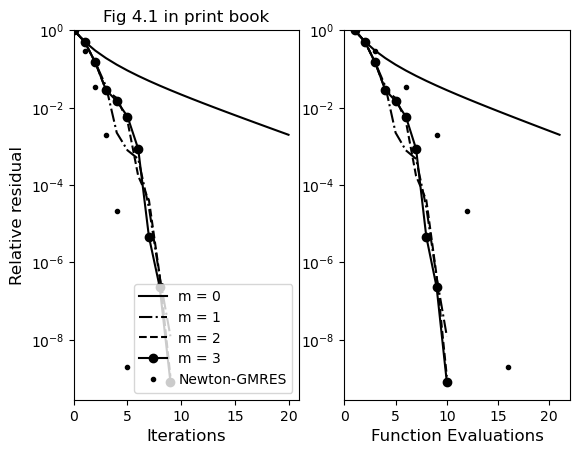

In [2]:
aa_heq();

### Convection-Diffusion Equation

In this section we formulate the left-preconditioned nonlinear
convection-diffusion equation as a fixed point problem. We let
$\mf$ be the nonlinear residual for the convection-diffusion problem
and
$\mP$ be the fast solver for the high order term. Following the
discussion in __Chapter 3__ we let
$$
\mf_P(\vx) = \mP \mf(\vx)
$$
and then obtain the fixed point map
$$
\mg(\vx) = \vx - \mP \mf(\vx).
$$

We build the fixed point map 
__hardleftFix!__
with the function __hardleft!__
(see __Section 3.6.2__) using the formula above. The Julia function __axpby!__ is a call to the
BLAS
<cite data-cite="linpack"><a href="siamfa.html#linpack">(DMBS79)</cite>,
<cite data-cite="lapack"><a href="siamfa.html#lapack">(ABB<sup>+</sup>92)</cite>,
The author of this book likes to
make BLAS calls, which can reduce the allocation burden
in Julia.


```
"""
hardleftFix!(FV, u, pdata)
Fixed point form of the left preconditioned nonlinear
convection-diffusion equation
"""
function hardleftFix!(FV, u, pdata)
FV = hardleft!(FV, u, pdata)
# G(u) = u - FV
axpby!(1.0, u, -1.0, FV)
return FV
end
```


While $\mg$ is a nonlinear integral operator, the map is not
a contraction and both Picard iteration and Anderson(1) diverge.
(Try it yourself!) However, Anderson(m) for $m \ge 2$ does converge
and, as __Figure 4.2__ illustrates, takes fewer function evaluations
(but more nonlinear iterations)
than Newton-GMRES for the left-preconditioned nonlinear problem (NewtonL)
or a Newton-GMRES iteration with right preconditioning for the linear
equation for the step (NewtonR). Unlike Newton-GMRES, which manages
the residual norm decrease with a line search, Anderson($m$) comes
with no guarantee that the residual norms decrease as the iteration
progresses, and they do not in this example (see iteration $3$ for
all $m$ and the very irregular residual history for $m=2$).

Remember that Anderson($m$)
needs roughly $3m$ vectors while GMRES($m$) needs roughly $m$ vectors.
For large $N$ and $m$
this can be a serious problem for Anderson($m$).

It is also interesting to see that Anderson($10$) __seems__ to perform best
and hence one gains something (fewer function evaluations)
for the increased storage burden. However (see __Section 4.5.3__)
function evaluations do not fully reflect the cost of the solve for this application.
The reader
should play with $m$ and see what happens as $m$ increases.


Failure to converge after 40 iterations for m=2 in aasol.jl


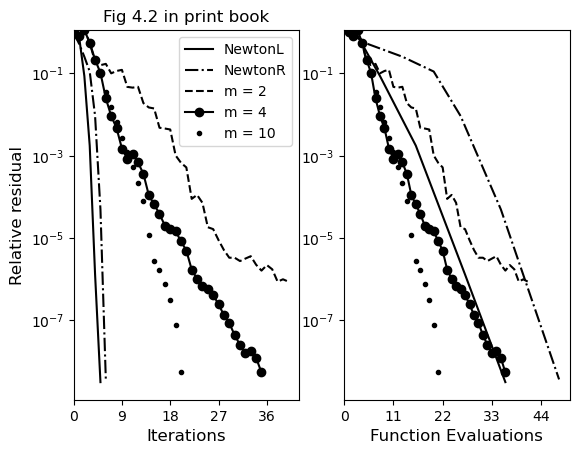

In [3]:
aa_pde();

## Next notebook = [Section 4.5: Solver for Chapter 4](SIAMFANLCh4s.ipynb)